In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Load the data as a pandas dataframe. Then we can do some data exploration

In [3]:
train_data = pd.read_csv('../train.csv')
test_data = pd.read_csv('../test.csv')

In [6]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Parsing the data into dataframes, and creating a mask of the dataframe for each label

In [61]:
labels = train_data.columns[2:].tolist()
print('Training data contains ', train_data.shape[0], ' comments.\n')
print('possible labels: ', labels)
masks = {} #will hold the row numbers for comments that are of each label
DFviews={} #will hold each mask applied to train_data


for label in labels:
  masks[label] = train_data[label] == 1
  DFviews[label] = train_data[masks[label]]
  print('There are ', np.sum(masks[label]),label,' comments. An example is: ')
  example = DFviews[label].sample(1)['comment_text'].item()
  example=  example.replace('\n', ' ')
  print((example[:100]+'... ' if len(example) > 100 else example), '\n')
  

Training data contains  159571  comments.

possible labels:  ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
There are  15294 toxic  comments. An example is: 
You are the same person!   You stupid ass crackhead you are the same person as Litany and KarlXII it...  

There are  1595 severe_toxic  comments. An example is: 
HEY DUMB FUCK  []This is my sock Joehazelton Hey Dumb fuck, If I was you I would get his  real name ...  

There are  8449 obscene  comments. An example is: 
(UTC)  Ass hole -  17:53, 9 March 2007 

There are  478 threat  comments. An example is: 
COME ON, SUCKA!  I WILL PUNCH YOUR FUCKING FACE AND ALL YOUR FAMILY! YOU SON OF A BITCH! FUCK YOU, S...  

There are  7877 insult  comments. An example is: 
You are a fucking cunt and a half. I hope your mother's vagina is raped with a chainsaw, you shit-ea...  

There are  1405 identity_hate  comments. An example is: 
Sidenote: Xizer is not a racist. Calling this guy a nigger was just funny though. l

Some of the comments are quite long (some of them are phrases repeated over and over). Let's see the distribution of the lengths according to label.

Distribution of comment lengths:
Mean:  394.073221325
Standard Deviation:  590.720281905


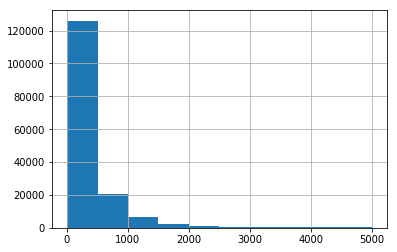

Distribution of  toxic  comment  lenghts:
Mean:  295.2460442
Standard Deviation:  617.37902539


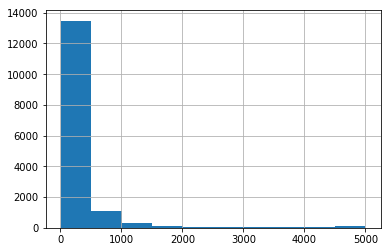

Distribution of  severe_toxic  comment  lenghts:
Mean:  453.635109718
Standard Deviation:  1090.98894268


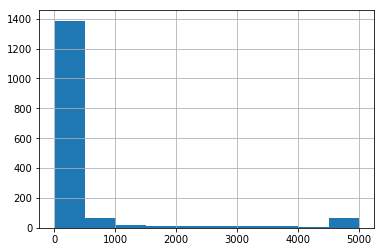

Distribution of  obscene  comment  lenghts:
Mean:  286.784826607
Standard Deviation:  641.088348586


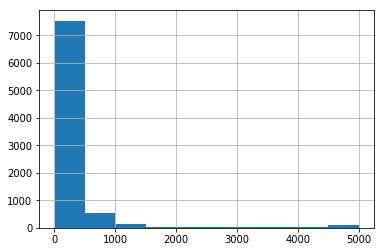

Distribution of  threat  comment  lenghts:
Mean:  307.740585774
Standard Deviation:  730.208700291


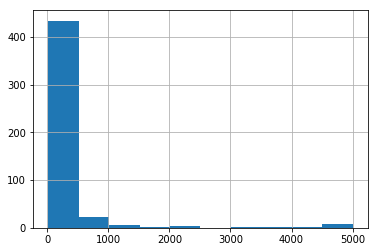

Distribution of  insult  comment  lenghts:
Mean:  277.284753079
Standard Deviation:  622.54687883


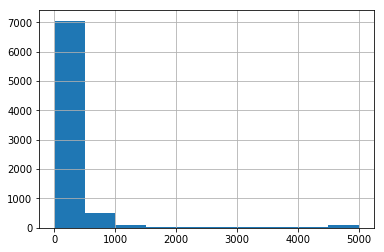

Distribution of  identity_hate  comment  lenghts:
Mean:  308.540925267
Standard Deviation:  691.629390869


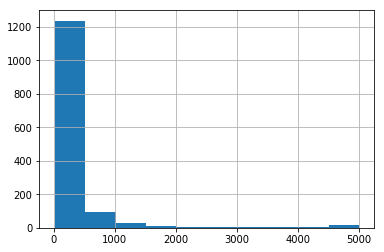

In [77]:
lengths = train_data.comment_text.str.len()
print("Distribution of comment lengths:")
print("Mean: ", lengths.mean())
print("Standard Deviation: ", lengths.std())
lengths.hist()
plt.show()

for label in labels:
  print("Distribution of ", label, " comment  lenghts:")
  lengths = DFviews[label].comment_text.str.len()
  print("Mean: ", lengths.mean())
  print("Standard Deviation: ", lengths.std())
  lengths.hist()
  plt.show()

Some interesting trends can be seen. Probably nothing that can be used for an actual classifier though. Let's create a validation dataset with 5000 datapoints and a testing set with 5000 datapoints, and verify that the distribution of labels is approximately the same as the distribution of labels in the original set.

In [121]:
shuffled = train_data.sample(frac=1).reset_index(drop=True)
train_df = shuffled[:-10000]
valid_df = shuffled[-10000:-5000]
test_df = shuffled[-5000:]

dist = np.ndarray(shape = [3,6])
for df, i in zip([train_df, valid_df, test_df],range(3)):
  for label, j in zip(labels, range(6)):
    dist[i,j] = np.mean(df[label].as_matrix())

distributions= pd.DataFrame(dist, columns=labels, index = ['train','valid','test'])
distributions

,toxic,severe_toxic,obscene,threat,insult,identity_hate
train,0.095674,0.009969,0.052844,0.002982,0.049201,0.008765
valid,0.102200,0.010600,0.057200,0.003200,0.053000,0.009600
test,0.094600,0.010200,0.051800,0.003200,0.050600,0.009200
